# 简单的线性回归程序

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 用于线性回归的类
from sklearn.linear_model import LinearRegression
# 用于切分训练集与测试集
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
# 设置输出精度，默认为8
np.set_printoptions(precision=3)

In [6]:
iris = load_iris()
# 获取花瓣长度为X，花瓣宽度为y
X, y = iris.data[:, 2].reshape(-1, 1), iris.data[:, 3]

In [8]:
display(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
lr = LinearRegression()
# 将数据划分为数据集与测试集
# test_size:测试集大小
# random_state：随机种子，用来产生相同的随机数系列
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)
# 使用训练集，训练模型
lr.fit(X_train, y_train)
print("权重：", lr.coef_)
print("截距：", lr.intercept_)
# 从训练集学习到的模型参数（W与b），确定方程，就可以进行预测
y_hat = lr.predict(X_test)
print("实际值：", y_test[:5])
print("预测值：", y_hat[:5])

权重： [0.42]
截距： -0.3705841202176683
实际值： [2.4 1.  0.2 1.8 0.2]
预测值： [1.77  1.309 0.217 2.274 0.259]


In [10]:
y_test

array([2.4, 1. , 0.2, 1.8, 0.2, 2.5, 0.3, 1.5, 1.4, 1.3, 1.4, 1.5, 1.2,
       1.5, 1.4, 0.1, 1.5, 1.2, 0.3, 0.4, 2. , 1.5, 0.2, 0.2, 1.8, 0.2,
       0.4, 1.3, 1. , 0.4, 1.8, 1.5, 0.2, 1.8, 2.2, 1.4, 0.3, 1.6])

In [31]:
y1_hat = lr.predict(X)

Text(0, 0.5, '花瓣宽度')

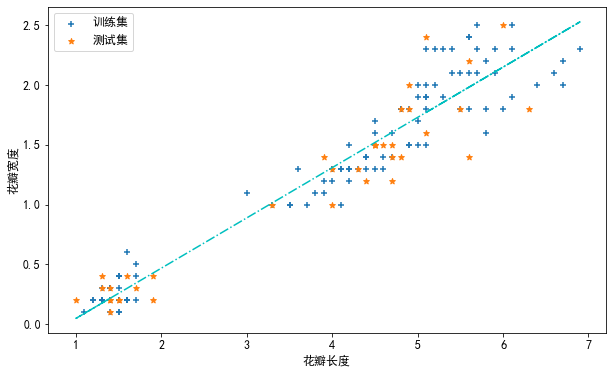

In [29]:
# 绘图
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 12

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, marker="+", label="训练集")
plt.scatter(X_test, y_test, marker="*", label="测试集")
plt.plot(X, lr.predict(X), 'c-.')
plt.legend()
plt.xlabel("花瓣长度")
plt.ylabel("花瓣宽度")

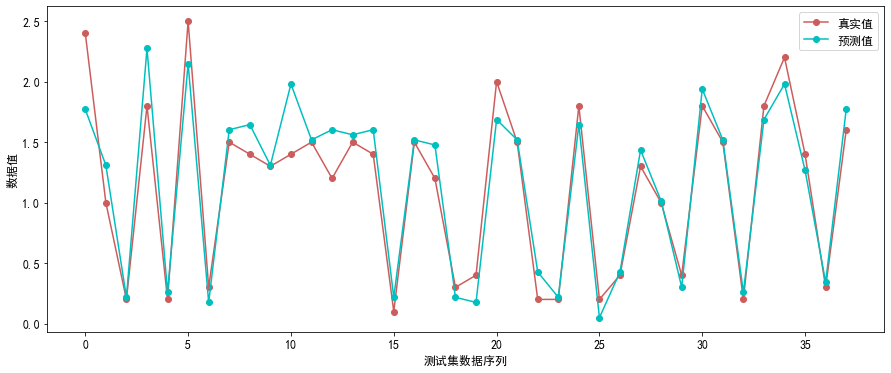

In [28]:
plt.figure(figsize=(15,6))
plt.plot(y_test,label="真实值",color="indianred", marker="o")
plt.plot(y_hat,label="预测值",color="c", marker="o")
plt.xlabel("测试集数据序列")
plt.ylabel("数据值")
plt.legend()

# R^2

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("均方误差（MSE）：", mean_squared_error(y_test, y_hat))
# print("均方误差（MSE）：", mean_squared_error(y, y1_hat))
print("根均方误差（RMSE）：", np.sqrt(mean_squared_error(y_test, y_hat)))
print("平均绝对值误差（MAE）：", mean_absolute_error(y_test, y_hat))
print("训练集R^2：", r2_score(y_train, lr.predict(X_train)))
print("测试集R^2：", r2_score(y_test, lr.predict(X_test)))
# score其实求解的就是r^2的值
# 注意r2_score方法和score方法传递参数的内容是不同的
print("训练集R^2：", lr.score(X_train, y_train))
print("测试集R^2：", lr.score(X_test, y_test))

均方误差（MSE）： 0.05212862079193859
根均方误差（RMSE）： 0.2283169305854005
平均绝对值误差（MAE）： 0.1673599103556632
训练集R^2： 0.9358824215964661
测试集R^2： 0.8931453922584154
训练集R^2： 0.9358824215964661
测试集R^2： 0.8931453922584154


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston

{'data': array([[6.320e-03, 1.800e+01, 2.310e+00, ..., 1.530e+01, 3.969e+02,
         4.980e+00],
        [2.731e-02, 0.000e+00, 7.070e+00, ..., 1.780e+01, 3.969e+02,
         9.140e+00],
        [2.729e-02, 0.000e+00, 7.070e+00, ..., 1.780e+01, 3.928e+02,
         4.030e+00],
        ...,
        [6.076e-02, 0.000e+00, 1.193e+01, ..., 2.100e+01, 3.969e+02,
         5.640e+00],
        [1.096e-01, 0.000e+00, 1.193e+01, ..., 2.100e+01, 3.934e+02,
         6.480e+00],
        [4.741e-02, 0.000e+00, 1.193e+01, ..., 2.100e+01, 3.969e+02,
         7.880e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 2

In [39]:
X, y = boston.data, boston.target
df = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1),
                  columns=boston.feature_names.tolist() + ["MEDV"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("模型权重：", lr.coef_)
print("截距：", lr.intercept_)
y_hat = lr.predict(X_test)
print("训练集R^2：", lr.score(X_train, y_train))
print("测试集R^2：", lr.score(X_test, y_test))

模型权重： [-1.177e-01  4.402e-02 -5.768e-03  2.393e+00 -1.559e+01  3.769e+00
 -7.035e-03 -1.435e+00  2.401e-01 -1.130e-02 -9.855e-01  8.444e-03
 -4.991e-01]
截距： 36.933255457118975
训练集R^2： 0.7697699488741149
测试集R^2： 0.6354638433202129


#  作业

In [3]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'F:\\kaikeba\\课件与代码\\05数据方法论\\day04'

In [4]:
data = pd.read_csv("./Advertising.csv")

In [5]:
del data["Unnamed: 0"]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X = pd.DataFrame(data, columns=['TV', 'Radio', 'Newspaper'])
y = pd.DataFrame(data, columns=['Sales'])
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)
print("模型权重：", lr.coef_)
print("截距：", lr.intercept_)
y_hat = lr.predict(X_test)
print("训练集R^2：", lr.score(X_train, y_train))
print("测试集R^2：", lr.score(X_test, y_test))
lr.predict(X_test)

模型权重： [[0.04416235 0.19900368 0.00116268]]
截距： [2.89257005]
训练集R^2： 0.9072183330817297
测试集R^2： 0.8576396745320892


array([[10.0494569 ],
       [ 7.43052335],
       [ 6.97152143],
       [24.16378667],
       [12.00215643],
       [ 6.54334645],
       [13.09526331],
       [14.95879164],
       [11.00528358],
       [16.27234553],
       [22.99324688],
       [ 9.12188347],
       [10.33545333],
       [15.39628185],
       [11.60589932],
       [12.11484332],
       [18.60251172],
       [10.81414474],
       [16.07541355],
       [17.22753644],
       [24.2342995 ],
       [ 9.47711838],
       [15.13960412],
       [12.41064749],
       [ 5.67814427],
       [15.22889947],
       [12.21635459],
       [20.94370559],
       [13.28068231],
       [ 9.16578351],
       [13.30285718],
       [21.5770033 ],
       [18.098111  ],
       [21.15572322],
       [ 6.69734039],
       [ 6.15355714],
       [ 7.96280151],
       [13.09426248],
       [14.81032968],
       [ 6.22020075],
       [12.2799744 ],
       [ 9.1817324 ],
       [15.04882696],
       [16.26091437],
       [17.16859664],
       [13

In [23]:
lr.fit??

In [24]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
coef = pd.DataFrame(lr.coef_)
coef = pd.DataFrame(coef.values.T)
coef

,0
0,0.044162
1,0.199004
2,0.001163


In [43]:
type(X_test)

pandas.core.frame.DataFrame